In [ ]:
import numpy as np
import torch
import torch.nn as nn

**Sample Datapoints**

In [ ]:
#function to create datapoints
def get_sampleDataPoints(n_sample):
    #creating 30 features with n samples
    features = torch.rand(n_sample,30)
    #target
    label=np.random.choice([0,1],size=10,p=[.5,.5]).reshape([-1,1])
    label=torch.from_numpy(label)
    #converting dtype to float
    features=features.float()
    label=label.float()
    return features,label

**Algorithm**

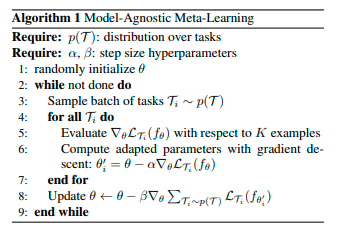

In [ ]:
#model agnostic meta learning 
class maml(nn.Module):
    def __init__(self,input_dim,out_dim,n_sample):
        super(maml, self).__init__()
        self.input_dim = input_dim
        self.out_dim = out_dim
        self.n_sample = n_sample
        self.weigth = nn.Parameter(torch.zeros(size=[input_dim,out_dim]))

    #forward propagation
    def forward(self):
        X_train,Y_train = get_sampleDataPoints(self.n_sample)
        #single layer network
        Y_predict =torch.matmul(X_train,self.weigth).reshape(-1,1)
        return Y_train,Y_predict

In [ ]:
#initalizing the model
MAML_model = maml(30,1,10)

In [ ]:
import torch.optim as optim
#Adam optimizer
optimizer = optim.Adam(MAML_model.parameters(),lr=0.01,weight_decay=1e-5)
#mean squared error loss
loss_function = nn.MSELoss()

In [ ]:
#parameter required
epoch = 30
tasks = 10
beta = 0.0001
optimal_parameter= torch.zeros(size=[10,30,1])
optimal_parameter = optimal_parameter.float()
init_parameter = torch.randn(size=[30,1])
init_parameter = init_parameter.float()
meta_gradient = torch.zeros_like(init_parameter)


In [ ]:
def train(epoch):
    loss_sum = 0.0
    global init_parameter,meta_gradient
    for i in range(tasks):
        #initialize the weight with random values
        MAML_model.weigth.data = init_parameter.data
        #clear out the gradients of all variables 
        optimizer.zero_grad()
        #training the model
        Y_train, Y_predict = MAML_model()
        #calculate the loss
        loss_value = loss_function(Y_train, Y_predict)
        loss_sum = loss_sum + loss_value.data.item()
        loss_value.backward()
        optimizer.step()
        #update parameter for i task
        optimal_parameter[i, :] = MAML_model.weigth

    for i in range(tasks):
        #initialize the weight with optimal parameter (result from previous step)
        MAML_model.weigth.data = optimal_parameter[i]
        optimizer.zero_grad()
        #training the model with testing datapoints / meta-training datapoints
        Y_test, Y_predict_test = MAML_model()
        #calculate the loss
        loss_value = loss_function(Y_test, Y_predict_test)
        loss_value.backward()
        optimizer.step()
        #updated weight in meta learning
        meta_gradient = meta_gradient + MAML_model.weigth.data
    #updating the initial parameter
    init_parameter = init_parameter - beta * meta_gradient / tasks
    print("The Epoch is {}".format(epoch+1),"the Loss is {:.4f}".format(loss_sum/tasks))


In [ ]:
for i in range(epoch):
       train(i)

The Epoch is 1 the Loss is 14.8962
The Epoch is 2 the Loss is 6.8466
The Epoch is 3 the Loss is 3.2195
The Epoch is 4 the Loss is 2.0754
The Epoch is 5 the Loss is 2.3242
The Epoch is 6 the Loss is 1.8852
The Epoch is 7 the Loss is 2.2538
The Epoch is 8 the Loss is 2.1799
The Epoch is 9 the Loss is 2.2450
The Epoch is 10 the Loss is 2.2359
The Epoch is 11 the Loss is 1.4678
The Epoch is 12 the Loss is 1.7162
The Epoch is 13 the Loss is 2.5152
The Epoch is 14 the Loss is 1.9831
The Epoch is 15 the Loss is 1.6457
The Epoch is 16 the Loss is 1.8276
The Epoch is 17 the Loss is 1.1243
The Epoch is 18 the Loss is 1.4552
The Epoch is 19 the Loss is 1.7544
The Epoch is 20 the Loss is 1.3519
The Epoch is 21 the Loss is 1.3554
The Epoch is 22 the Loss is 1.3828
The Epoch is 23 the Loss is 0.9462
The Epoch is 24 the Loss is 1.5066
The Epoch is 25 the Loss is 1.0497
The Epoch is 26 the Loss is 1.0931
The Epoch is 27 the Loss is 0.9268
The Epoch is 28 the Loss is 1.0272
The Epoch is 29 the Loss is 